PROJETO ANÁLISE DE CRÉDITO

In [80]:
#importando as Libs necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
#Carregando DF
df = pd.read_csv("train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
df.shape

(614, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [56]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [58]:
#Excluindo valores Nulos de Colunas Exceto Credit History e Loan Amount, pela sua relevância  e QNTD de Valores NULL
colunas_excluidas = df.columns.difference(['LoanAmount', 'Credit_History', 'Self_Employed', 'Dependents'])
df = df.dropna(subset=colunas_excluidas)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            584 non-null    object 
 1   Gender             584 non-null    object 
 2   Married            584 non-null    object 
 3   Dependents         573 non-null    object 
 4   Education          584 non-null    object 
 5   Self_Employed      553 non-null    object 
 6   ApplicantIncome    584 non-null    int64  
 7   CoapplicantIncome  584 non-null    float64
 8   LoanAmount         563 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     535 non-null    float64
 11  Property_Area      584 non-null    object 
 12  Loan_Status        584 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 63.9+ KB


In [60]:
#Preenchendo Valores Null da Coluna Loan Amount pela Média
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [61]:
#Separando as Variáveis em Independentes e Dependentes
X = df.drop(["Loan_ID","Loan_Status"],axis=1)
y = df["Loan_Status"]

In [62]:
#Codificando as variáveis Categóricas em Numéricas
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = pd.get_dummies(y,drop_first=True)

In [63]:
#Preenchendo os valores missing das outras colunas com KNN Imputer para obter mais precisão
knnmputer = KNNImputer(n_neighbors=5)
X_Preenchido = knnmputer.fit_transform(X_encoded)
X_Preenchido_df = pd.DataFrame(X_Preenchido,columns=X_encoded.columns)
X_Preenchido_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          584 non-null    float64
 1   CoapplicantIncome        584 non-null    float64
 2   LoanAmount               584 non-null    float64
 3   Loan_Amount_Term         584 non-null    float64
 4   Credit_History           584 non-null    float64
 5   Gender_Male              584 non-null    float64
 6   Married_Yes              584 non-null    float64
 7   Dependents_1             584 non-null    float64
 8   Dependents_2             584 non-null    float64
 9   Dependents_3+            584 non-null    float64
 10  Education_Not Graduate   584 non-null    float64
 11  Self_Employed_Yes        584 non-null    float64
 12  Property_Area_Semiurban  584 non-null    float64
 13  Property_Area_Urban      584 non-null    float64
dtypes: float64(14)
memory usag

In [64]:
X_Preenchido_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,145.683837,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2900.0,0.0,71.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,4106.0,0.0,40.000000,180.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
581,8072.0,240.0,253.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
582,7583.0,0.0,187.000000,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Podemos verificar que para as Colunas:
-Gender: 1 é Feminino e 

In [65]:
#Separando as features em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_Preenchido_df,y_encoded,test_size=0.3, random_state=1)

In [66]:
#Aplicando a Regressão Logística
model = LogisticRegression(max_iter = 200)
model.fit(X_train,y_train)

c:\Users\andre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200)

In [73]:
#Métricas para o Modelo
predictions = model.predict(X_test)
predictions_probabilidade = model.predict_proba(X_test)[:,1]

accuracia = accuracy_score(y_test,predictions)
precisao = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
roc_auc = roc_auc_score(y_test,predictions)


print(f"acuracia: {accuracia:.2f}")
print(f"Precisao: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC ROC: {roc_auc:.2f}")

acuracia: 0.85
Precisao: 0.84
Recall: 0.98
F1 Score: 0.91
AUC ROC: 0.75


In [83]:
#Matriz de Confusão
conf_matrix = confusion_matrix(y_test,predictions)

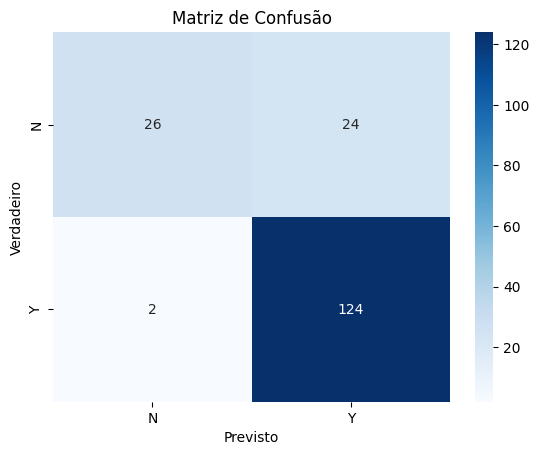

In [86]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])


plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')   
plt.title('Matriz de Confusão')  
plt.show()
